<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/TanksGamePhysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import math
#Set up the game screen including position of tower and position of tanks
class defineScene:
  def __init__(self, towerHeight):
    self.tank1 = 3
    self.tank2 = 3
    self.posTank1 = [2,0]
    self.posTank2 = [8,0]
    self.tower = towerHeight
    self.towerPosX = 5

In [38]:
class playGameNoTower:
  def __init__(self, scene):
    self.turn = 1
    self.angle = 0
    self.velocity = 0
    self.tank1 = scene.tank1
    self.tank2 = scene.tank2
    self.posTank1 = scene.posTank1
    self.posTank2 = scene.posTank2

  def makeMove(self, angleIn,velocityIn):
    self.angle = angleIn
    self.velocity = velocityIn
    xSim = []
    ySim = []
    if(self.turn == 1):
      #Left sides turn
      currentX = self.posTank1[0]
      currentY = self.posTank1[1]
      landed = False
      time=0
      while(not landed):
        time+=0.01
        xSim.append(currentX)
        ySim.append(currentY)
        currentX = 2+self.velocity*math.cos((self.angle*math.pi/180))*time
        currentY = 1/2*(-10)*(time**2)+(self.velocity*math.sin((self.angle*math.pi/180)))*time
        if(currentY<=0):
          landed = True
        if(landed and currentX+0.5>8 and currentX-0.5<8):
          self.tank2 -=1
      self.turn *= -1
      return xSim,ySim
    elif(self.turn == -1):
      #Right sides turn
      currentX = self.posTank2[0]
      currentY = self.posTank2[1]
      landed = False
      time=0
      while(not landed):
        time+=0.01
        xSim.append(currentX)
        ySim.append(currentY)
        currentX = 8-self.velocity*math.cos((self.angle*math.pi/180))*time
        currentY = 1/2*(-10)*(time**2)+(self.velocity*math.sin((self.angle*math.pi/180)))*time
        if(currentY<=0):
          landed = True
        if(landed and currentX-0.5<2 and currentX+0.5>2):
          self.tank1 -=1
      self.turn*=-1
      return xSim,ySim

  def checkWin(self):
    if(self.tank1 == 0):
      print("Right side wins")
      return True
    elif(self.tank2==0):
      print("Left side wins")
      return True
    else:
      return False

Tank 1: 3   -----   Tank 2: 3

What is the velocity? 10
What is the angle? 45


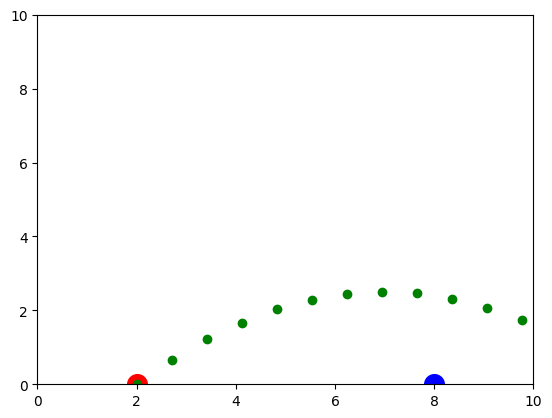

Tank 1: 3   -----   Tank 2: 3

What is the velocity? end


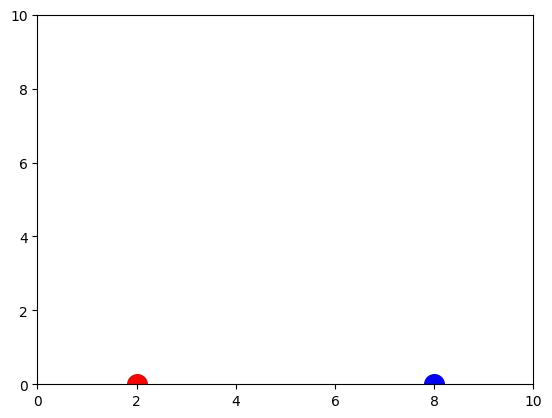

In [37]:
import matplotlib.pyplot as plt

#playItWithNoTower
playingScene = defineScene(0)
testGame = playGameNoTower(playingScene)

turns= 0
while(not (testGame.checkWin()==True)):
  turns+=1
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.scatter([2],[0], color = "red", s=200)
  plt.scatter([8],[0], color = "blue", s=200)
  print("Tank 1: "+str(playingScene.tank1)+ "   -----   Tank 2: " + str(playingScene.tank2) +"\n")
  vel = (input("What is the velocity? "))
  if(vel == "end"):
    break
  vel = float(vel)
  ang = float(input("What is the angle? "))
  if(not turns ==1):
    plt.close
  x,y = testGame.makeMove(ang, vel)
  plt.scatter(x,y, color = "green")
  plt.show()
